# Absorção de Raios-X - Análise de dados

Notebook com análise de dados do experimento de absorção de raios-x por diferentes filtros ($Zr$, $Mo$, $Al$)

In [304]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from scipy.optimize import curve_fit
from scipy.constants import h as planck, e, c
from scipy.interpolate import interp1d
from scipy.signal import find_peaks

h = planck / e

In [282]:
plt.rcParams['figure.figsize'] = (8,6)
plt.rcParams['figure.facecolor'] = 'white'
sns.set_theme()

In [283]:
lattice     = { 'NaCl': 0.564E-9, 'KBr': 0.659E-9 }
cols        = [ 'Sem_Filtro', 'Zr', 'Mo', 'Al' ]
filters     = { 'Zr': pd.read_csv('zr.csv'), 'Mo': [], 'Al': [] }
density     = { 'Zr': 6.49, 'Mo': 1.0, 'Al': 1.0 }

In [284]:
attenuation = {
    'Zr': interp1d(filters['Zr']['Energia'] * 1E6, filters['Zr']['Atenuacao'] * density['Zr']),
    'Mo': [],
    'Al': []
}

In [285]:
df = { 'NaCl': [], 'KBr': [] }

## Análise de Absortância

### $NaCl$ - Cloreto de Sódio

In [286]:
df['NaCl'] = pd.read_csv('nacl.csv')

In [287]:
df['NaCl']['Wavelength'] = lattice['NaCl'] * np.sin(np.radians(df['NaCl']['Beta']))
df['NaCl']['Energia'] = h * c / df['NaCl']['Wavelength']

[]

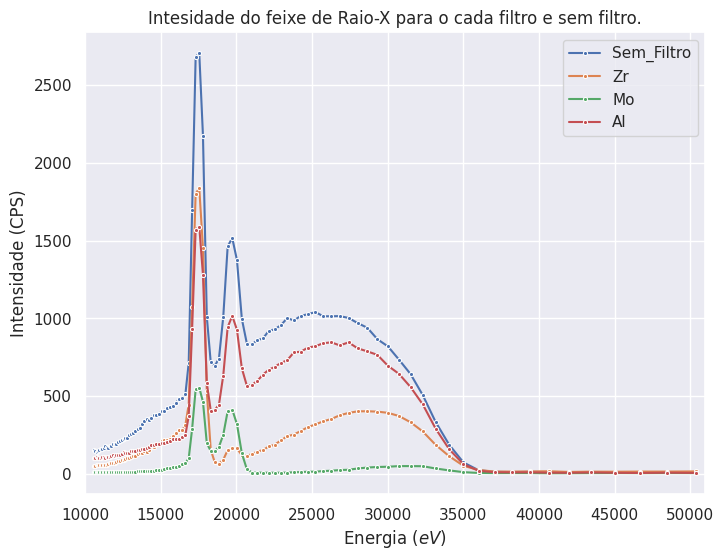

In [288]:
plt.title('Intesidade do feixe de Raio-X para o cada filtro e sem filtro.')
for col in cols: sns.lineplot(data=df['NaCl'], x='Energia', y=col, label=col, marker='.')
plt.xlabel('Energia ($eV$)')
plt.ylabel('Intensidade (CPS)')
plt.xlim(10000, 51000)
plt.legend()
plt.plot()

In [289]:
df['NaCl']['Absortancia Zr'] = df['NaCl']['Sem_Filtro'] / df['NaCl']['Zr']
df['NaCl']['Absortancia Mo'] = df['NaCl']['Sem_Filtro'] / df['NaCl']['Mo']
df['NaCl']['Absortancia Al'] = df['NaCl']['Sem_Filtro'] / df['NaCl']['Al']

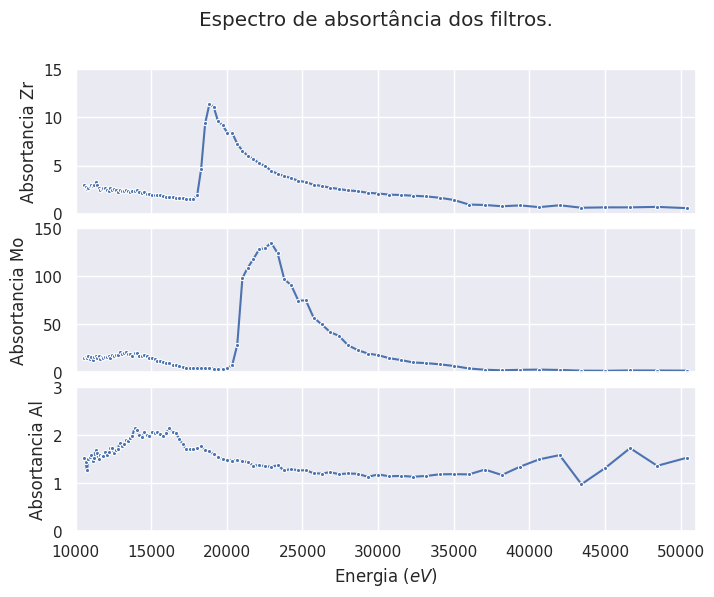

In [290]:
figs, axs = plt.subplots(3, sharex=True, gridspec_kw={ 'hspace': 0.1 })
plt.suptitle('Espectro de absortância dos filtros.')

ylims = ((0, 15), (0, 150), (0, 3))
for i,col in enumerate(cols[1:]):
  sns.lineplot(data=df['NaCl'], x='Energia', y=f'Absortancia {col}', marker='.', ax=axs[i])
  axs[i].set_ylim(ylims[i])

plt.xlabel('Energia ($eV$)')
plt.xlim(10000, 51000)
plt.show()

In [312]:
peak = find_peaks(df['NaCl']['Absortancia Zr'], height=10)[0] + 4

In [313]:
df['NaCl']['Energia'][peak]

46    17785.397462
Name: Energia, dtype: float64

### $KBr$ - Brometo de Potássio

In [291]:
df['KBr'] = pd.read_csv('kbr.csv')

In [292]:
df['KBr']['Wavelength'] = lattice['KBr'] * np.sin(np.radians(df['KBr']['Beta']))
df['KBr']['Energia'] = h * c / df['KBr']['Wavelength']

[]

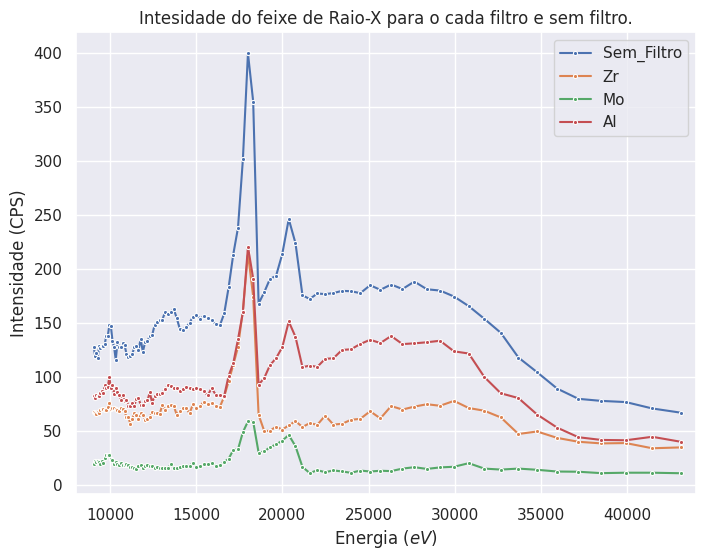

In [293]:
plt.title('Intesidade do feixe de Raio-X para o cada filtro e sem filtro.')
for col in cols: sns.lineplot(data=df['KBr'], x='Energia', y=col, label=col, marker='.')
plt.xlabel('Energia ($eV$)')
plt.ylabel('Intensidade (CPS)')
plt.xlim(8000, 44000)
plt.legend()
plt.plot()

In [294]:
df['KBr']['Absortancia Zr'] = df['KBr']['Sem_Filtro'] / df['KBr']['Zr']
df['KBr']['Absortancia Mo'] = df['KBr']['Sem_Filtro'] / df['KBr']['Mo']
df['KBr']['Absortancia Al'] = df['KBr']['Sem_Filtro'] / df['KBr']['Al']

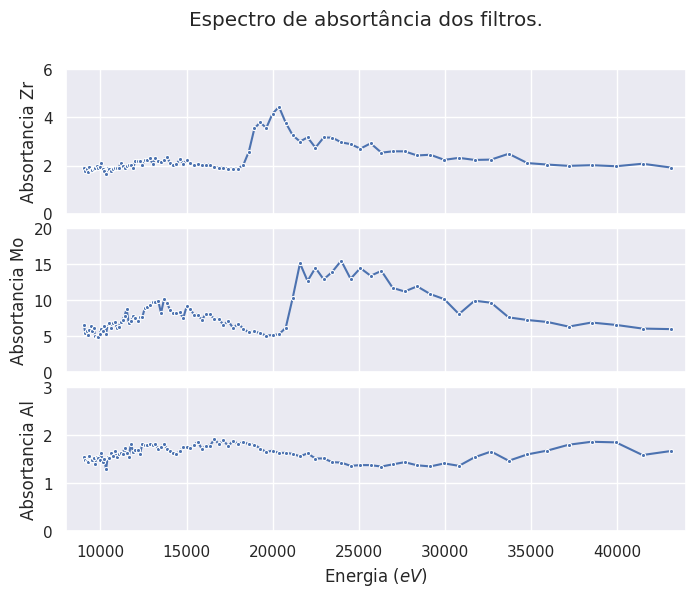

In [295]:
figs, axs = plt.subplots(3, sharex=True, gridspec_kw={ 'hspace': 0.1 })
plt.suptitle('Espectro de absortância dos filtros.')

ylims = ((0, 6), (0, 20), (0, 3))
for i,col in enumerate(cols[1:]):
  sns.lineplot(data=df['KBr'], x='Energia', y=f'Absortancia {col}', marker='.', ax=axs[i])
  axs[i].set_ylim(ylims[i])

plt.xlabel('Energia ($eV$)')
plt.xlim(8000, 44000)
plt.show()

## Estimativa da espessura do filtro

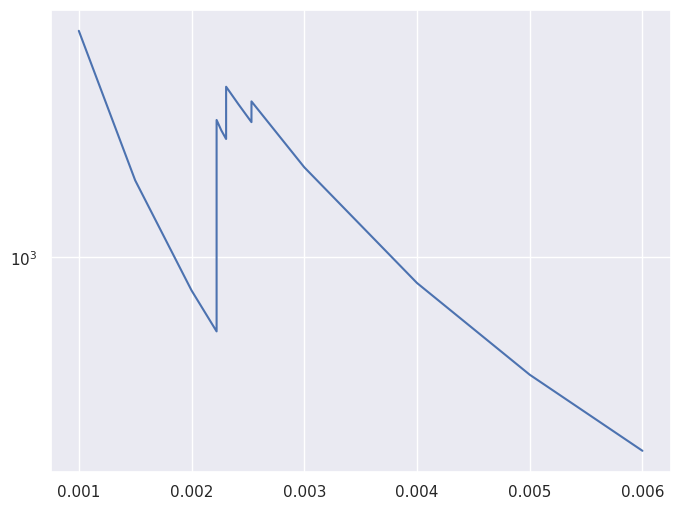

In [301]:
plt.plot(filters['Zr']['Energia'][0:15], filters['Zr']['Atenuacao'][0:15])
plt.yscale('log')

In [297]:
filters['Zr']

,Energia,Atenuacao,Coeficiente
0,0.001000,4210.00000,4203.00000
1,0.001500,1631.00000,1625.00000
2,0.002000,811.50000,805.70000
3,0.002222,625.80000,620.10000
4,0.002222,2392.00000,2335.00000
5,0.002264,2239.00000,2186.00000
6,0.002307,2120.00000,2071.00000
7,0.002307,2953.00000,2878.00000
8,0.002417,2641.00000,2575.00000
9,0.002532,2359.00000,2303.00000
